# Power Machine Learning With TensorFlow: What Does Your Doodle Look Like? Image Classification With TensorFlow

Note: you can install the requirements file for this notebook if you want to install all the libraries at once. Open a new terminal window, navigate to the folder with the "requirements_jupyter.txt" and run the following command:

pip3 install -r requirements_jupyter.txt

In [1]:
# !pip3 install -r requirements_jupyter.txt

In [2]:

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np


## Load the MNIST data from Tensorflow's tutorials library

In [3]:
# this will take a while the first time you call it as it will download the 
# data from the internet - subsequent runs will use the data stored locally
# if you get an SSL error, try fix: "/Applications/Python\ 3.6/Install\ Certificates.command"
# https://github.com/tensorflow/tensorflow/issues/10779
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [4]:

import matplotlib.pyplot as plt
batch = mnist.train.next_batch(1)
sample_digit = batch[0]
sample_digit = sample_digit.reshape(28, 28)
plt.imshow(sample_digit, cmap='gray')
plt.show()


<Figure size 640x480 with 1 Axes>

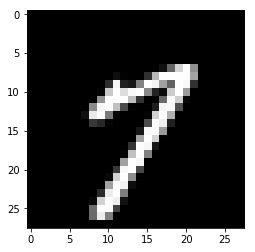

In [5]:
first_digit = mnist.train.images[0]
first_digit = np.array(first_digit, dtype='float')
first_digit = first_digit.reshape((28, 28))
plt.imshow(first_digit, cmap='gray')
plt.show()

In [6]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

### Access the label in legible format

In [7]:
np.argmax(mnist.train.labels[0])

7

# Tensorflow Modeling
Based the following this tutorial (but with some modefications to handle saving of model for later re-use):
https://www.tensorflow.org/versions/r1.1/get_started/mnist/pros


In [8]:
import os
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# The file path to save the data
save_file = os.path.join(os.getcwd(), 'model.ckpt')

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

# First convolutional layer
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
x_image = tf.reshape(x, [-1, 28, 28, 1])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# Second convolutional layer
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# Densely Connected Layer
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# Readout Layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2, name='y')
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Training steps
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    max_steps = 2000
    for step in range(max_steps):
        batch_xs, batch_ys = mnist.train.next_batch(50)
        if (step % 100) == 0:
            print(step, sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 0.5})
    print(max_steps, sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

    saver = tf.train.Saver()
    save_path = saver.save(sess, save_file)
    print ("Model saved in file: ", save_path)
 


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0 0.1022
100 0.8494
200 0.9164
300 0.9269
400 0.9419
500 0.9483
600 0.9537
700 0.9587
800 0.9603
900 0.9652
1000 0.9674
1100 0.9649
1200 0.9691
1300 0.9696
1400 0.9734
1500 0.9731
1600 0.9737
1700 0.9742
1800 0.9757
1900 0.9776
2000 0.9764
Model saved in file:  /Users/manuelamunategui/Desktop/ml-web-downloads/chapter8/model.ckpt


## Loading up a saved and trained model to run our predictions
We need to rebuild the plumbing but don't need to load the data or run the model, simply feed the checkpoints to the saver function. To test the model we will add a PNG image: 'mnist_5.png', so we're looking for the model to predict "5"

In [9]:
import os
save_file = os.path.join(os.getcwd(), 'model.ckpt')
import tensorflow as tf
from PIL import Image
import sys
import matplotlib.pyplot as plt
import numpy as np

# restore the saved session
tf.reset_default_graph()

# set all variables needed like in orginal model 
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

# First convolutional layer
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
x_image = tf.reshape(x, [-1, 28, 28, 1])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# Second convolutional layer
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# Densely Connected Layer
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# Readout Layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2, name='y')
 
# fix image to be in abide by our model's format requirements
img = Image.open('mnist_5.png')
img = img.resize([28,28])
corrected_img = Image.new("RGBA", (28, 28), "white")
corrected_img.paste(img, (0,0), img)
corrected_img = np.asarray(corrected_img)
# remove color dimensions
corrected_img = corrected_img[:, :, 0]
corrected_img = np.invert(corrected_img)
# flatten
corrected_img = corrected_img.reshape([784])
# center around 0-1
img = np.asarray(corrected_img, dtype=np.float32) / 255.
 
# Training steps
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    saver.restore(sess, save_file)
    print("Model restored.")
    print(sess.run(tf.argmax(y_conv,1), feed_dict={x: [img], keep_prob: 1.0}))

        

INFO:tensorflow:Restoring parameters from /Users/manuelamunategui/Desktop/ml-web-downloads/chapter8/model.ckpt
Model restored.
[5]
